#Importing Dataset and required libraries

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving healthcare_dataset.csv to healthcare_dataset.csv


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
hc = pd.read_csv(io.BytesIO(uploaded['healthcare_dataset.csv']))
hc.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


#Dataset overview


*   Column datatypes, Summary stats, shape of the dataset



In [ ]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [ ]:
hc.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [ ]:
#summary stats of the dataframe's categorical columns of dtype object
hc.describe(include = 'O')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,1815,9416,8639,5,3,1834,5,3
top,Michael Johnson,Female,AB-,Asthma,2019-04-12,Michael Johnson,Smith PLC,Cigna,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,5075,1275,1708,15,7,19,2040,3391,14,2079,3456


In [ ]:
hc.shape

(10000, 15)

# Data cleaning


*   Check for null values, duplicates
*   Create column for calculating total days hospitalized
*   Drop irrelevant columns (name, admission date, discharge date, room number)





In [ ]:
hc.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

We have no null values in our dataset.

In [ ]:
hc.duplicated().sum()

0

We have no duplicate records in the dataset.

In [ ]:
hc.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [ ]:
#Since 'Date of Admission' and 'Discharge Date' have dtype of objects, we need to reformat it as datetime

for date in ['Date of Admission', 'Discharge Date']:
  hc[date] = pd.to_datetime(hc[date])

#Calculate the number of days a pt was in the hospital using the difference between these dates
hc['Days Hospitalized'] = (hc['Discharge Date'] - hc['Date of Admission']).dt.days
hc['Days Hospitalized'] = hc['Days Hospitalized'].astype(int)
hc.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days Hospitalized
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,14
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24


In [ ]:
hc = hc.drop(columns = ['Name', 'Date of Admission', 'Discharge Date', 'Room Number'])
hc.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'Days Hospitalized'],
      dtype='object')

#Data Exploration and Visualization

The goal here is to get a count of the different types of values in the categorical columns, excluduing name based columns like Doctor and Hospital.

In [ ]:
for col in hc.columns:
  if hc[col].dtype == 'O' and col != 'Doctor' and col != 'Hospital':
    print(hc[col].value_counts())
    print('---------')

Female    5075
Male      4925
Name: Gender, dtype: int64
---------
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: Blood Type, dtype: int64
---------
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: Medical Condition, dtype: int64
---------
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: Insurance Provider, dtype: int64
---------
Urgent       3391
Emergency    3367
Elective     3242
Name: Admission Type, dtype: int64
---------
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: Medication, dtype: int64
---------
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: Test Results, dtype: int64
---------


Here we plot histograms to find the frequency of numeric columns (age, billing amount and days hospitalized).

----------------------------------------------------------------------------------------------------


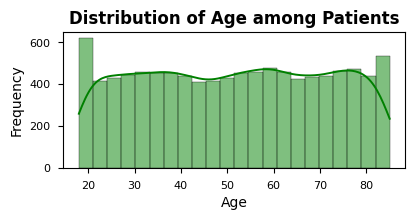

----------------------------------------------------------------------------------------------------


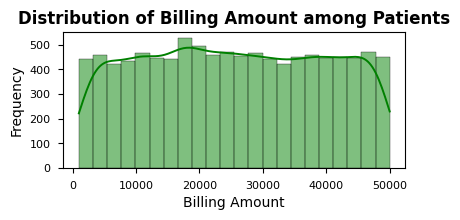

----------------------------------------------------------------------------------------------------


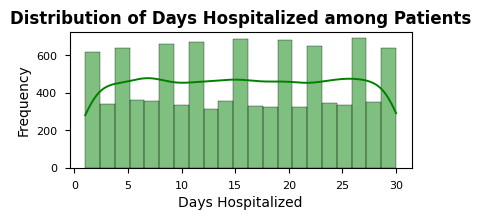

In [ ]:
for col in hc.columns:
  if hc[col].dtype == 'int' or hc[col].dtype == 'float':
    plt.figure(figsize = (15,6))
    plt.style.use('seaborn-paper')
    plt.subplot(3,3,3)
    sns.histplot(hc[col], kde = True, color = 'green')
    plt.ylabel('Frequency', fontsize = 10)
    plt.xlabel(col,fontsize = 10)
    plt.title(f'Distribution of {col} among Patients', fontsize = 12, weight = 'bold')
    print("-"*100)
    plt.show()

Here we will plot bar and pie charts to represent the categorial columns.

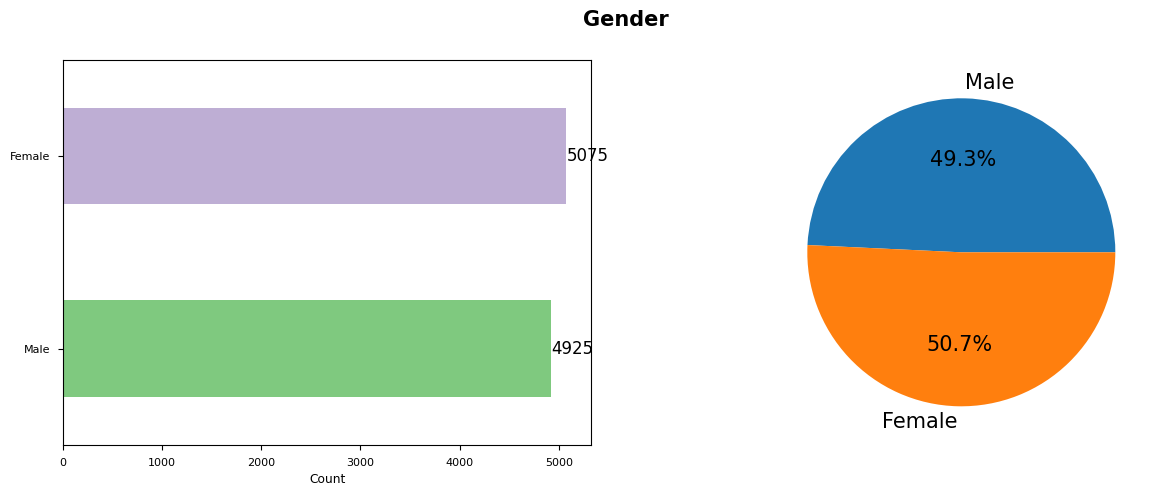

____________________________________________________________________________________________________




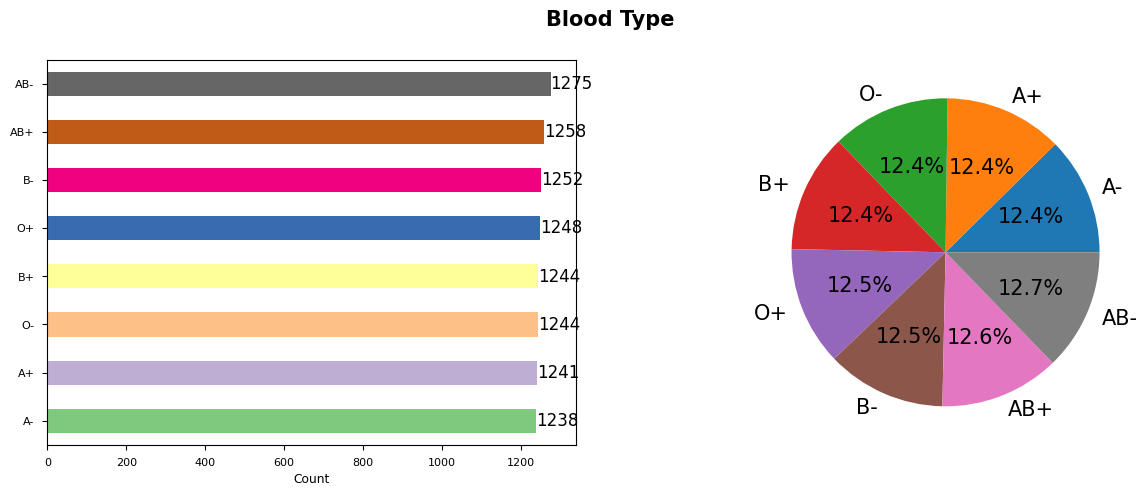

____________________________________________________________________________________________________




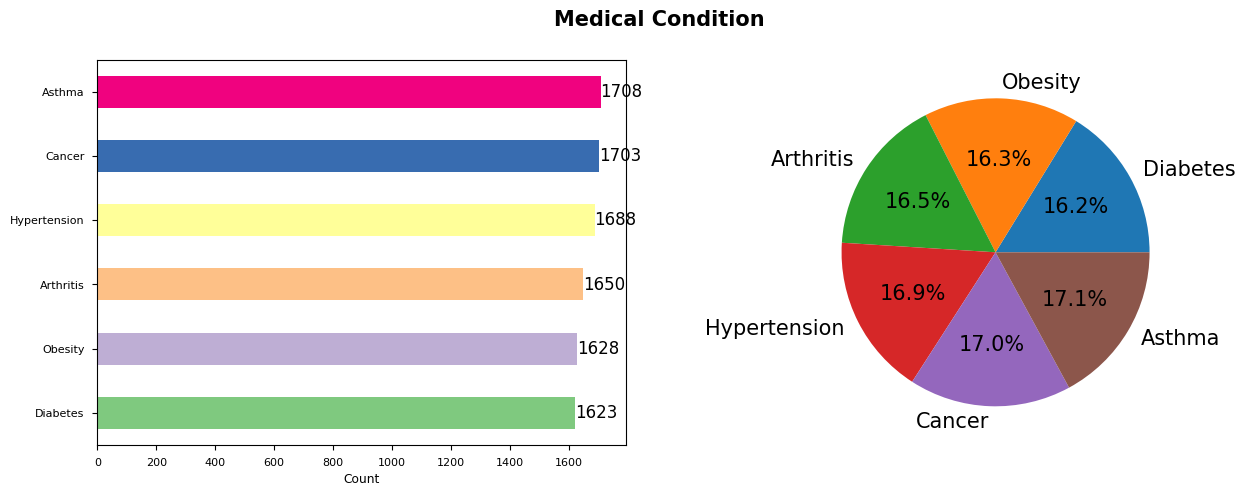

____________________________________________________________________________________________________




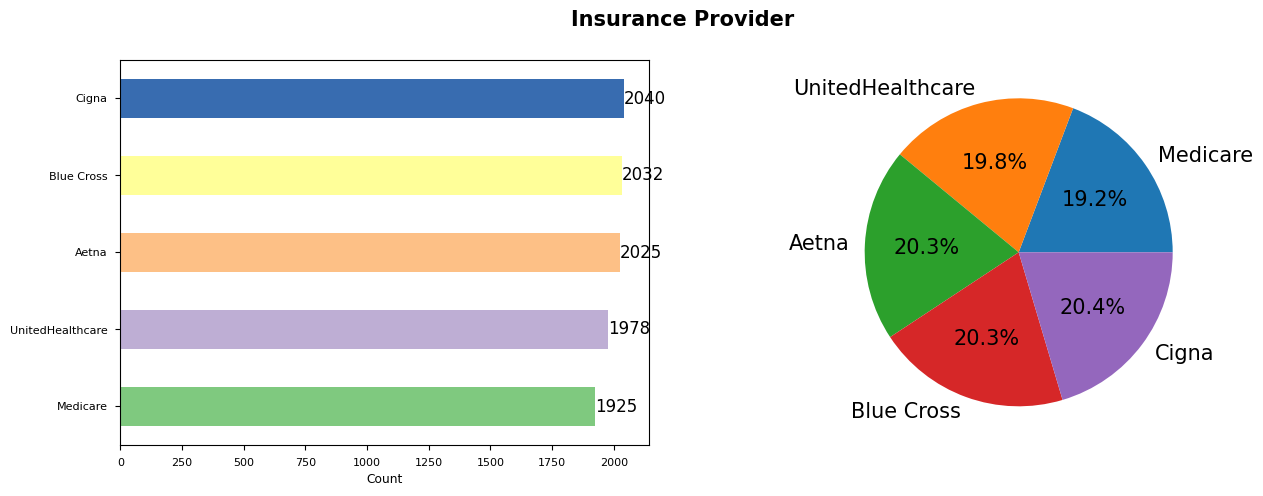

____________________________________________________________________________________________________




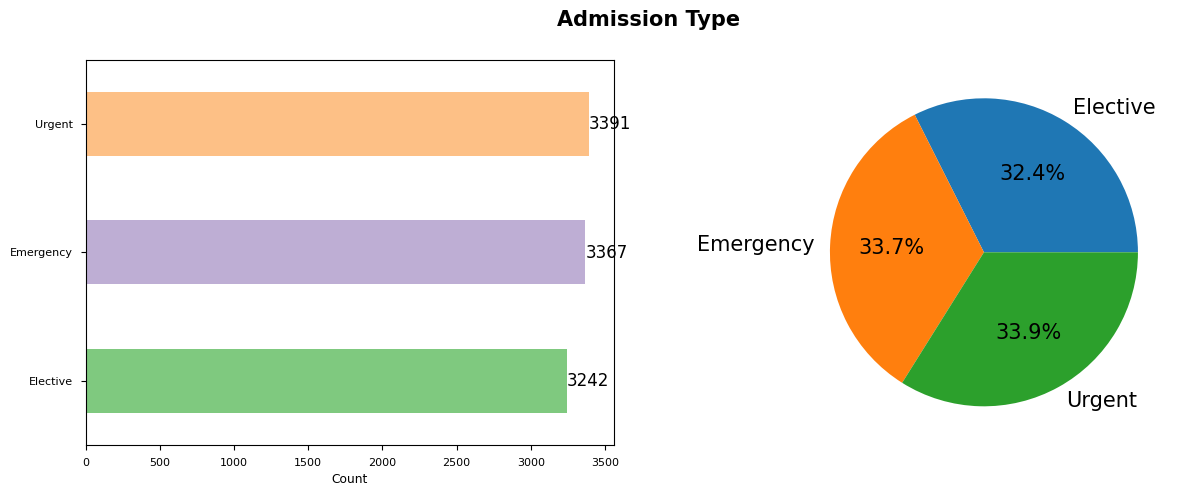

____________________________________________________________________________________________________




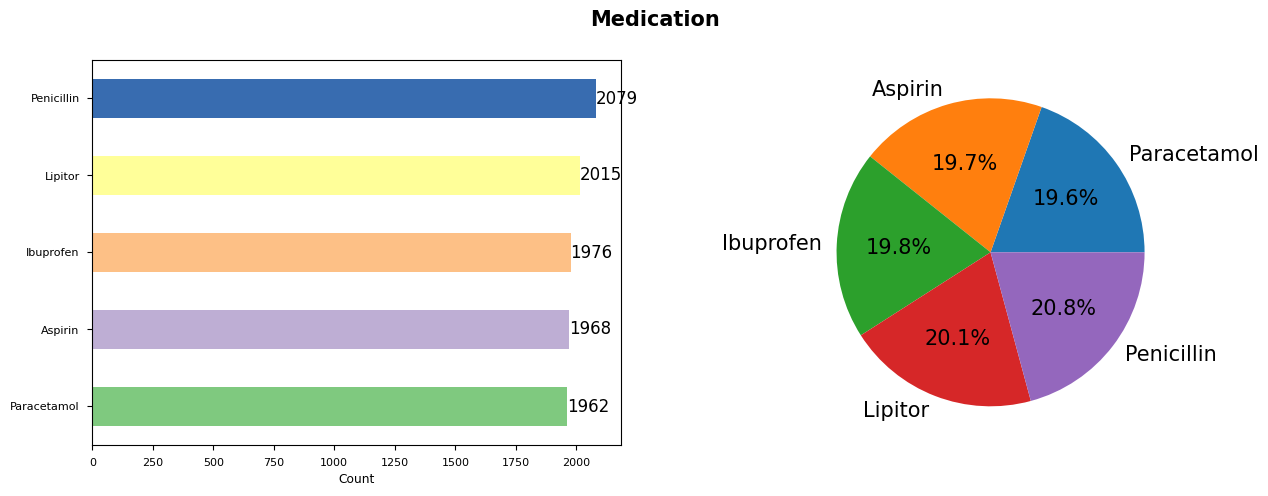

____________________________________________________________________________________________________




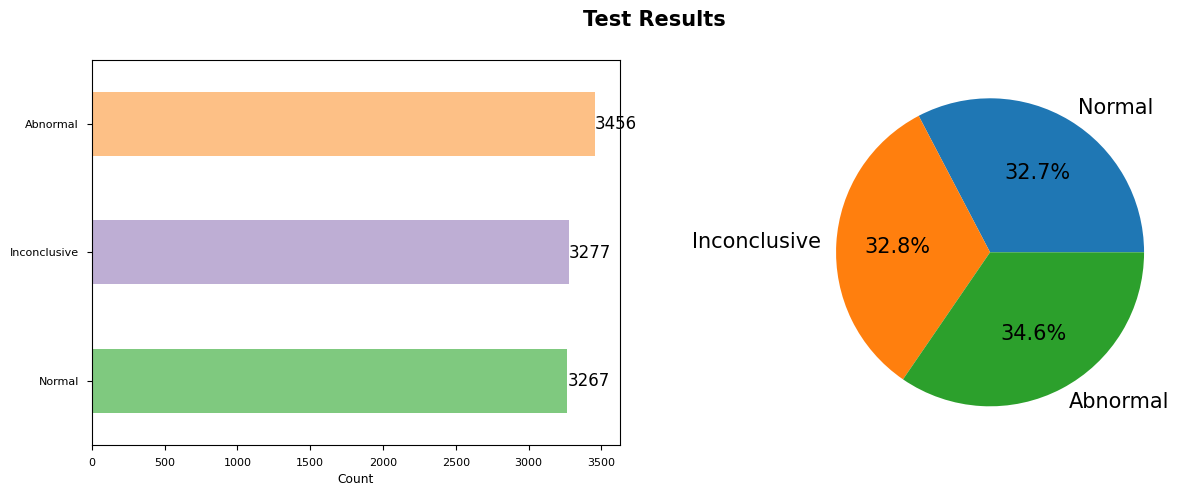

____________________________________________________________________________________________________


In [30]:
for col in hc.columns:
  if hc[col].dtype == 'O' and col != 'Doctor' and col != 'Hospital':
    print('\n')
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    fig.suptitle(col, fontsize = 15, weight = 'bold')
    plt.subplot(1,2,1)
    category_count = hc[col].value_counts().sort_values()
    category_count.plot(kind = 'barh', color = plt.cm.Accent.colors)

    for index, value in enumerate(category_count):
      plt.text(value, index, str(value), fontsize = 12, va = 'center')

    plt.xlabel('Count')
    plt.subplot(1,2,2)
    category_count.plot(kind = 'pie',
                        labels = category_count.index,
                        autopct = '%1.1f%%',
                        textprops = {'fontsize': 15})
    plt.ylabel('')
    plt.show()
    print("_"*100)

**Distribution of medical conditions between genders**

In [ ]:
medical_by_gender = hc.groupby(['Medical Condition', 'Gender']).size().sort_values().unstack()
medical_by_gender

Gender,Female,Male
Medical Condition,,
Arthritis,815,835
Asthma,874,834
Cancer,887,816
Diabetes,825,798
Hypertension,836,852
Obesity,838,790


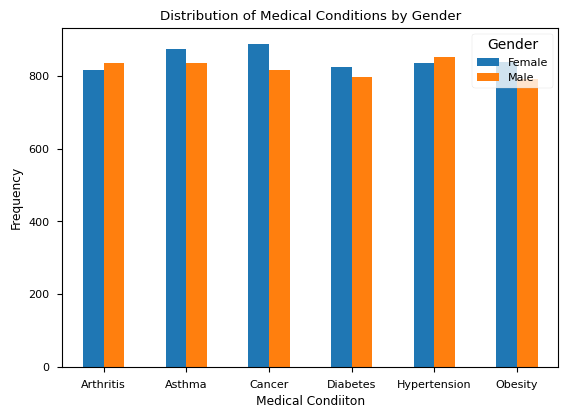

In [ ]:
medical_by_gender.plot(kind = 'bar')
plt.title('Distribution of Medical Conditions by Gender')
plt.xlabel('Medical Condiiton')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

Here, we can see that female patients have a higher frequency of most medical conditions. Cancer is the leading medical condition amont female patients whereas hypertension is the leading cause among males.

**What is the correlation between age, billing amount and days hospitalized?**

In [ ]:
#selecting columns to correlate
correlation_columns = ['Age', 'Billing Amount', 'Days Hospitalized']
correlate_df = hc[correlation_columns]

#encoding categorical columns for correlation
correlate_df['Gender'] = hc['Gender'].astype('category').cat.codes

correlate_df['Admission Type'] = hc['Admission Type'].astype('category').cat.codes

correlate_df['Test Results'] = hc['Test Results'].astype('category').cat.codes

#creating the correlation matrix

correlation_matrix = correlate_df.corr()

correlation_matrix

,Age,Billing Amount,Days Hospitalized,Gender,Admission Type,Test Results
Age,1.000000,-0.009483,0.009111,-0.008099,0.003233,0.008747
Billing Amount,-0.009483,1.000000,-0.013507,0.002340,0.002531,-0.005844
Days Hospitalized,0.009111,-0.013507,1.000000,-0.006361,-0.005942,-0.008228
Gender,-0.008099,0.002340,-0.006361,1.000000,-0.004515,-0.010472
Admission Type,0.003233,0.002531,-0.005942,-0.004515,1.000000,-0.010964
Test Results,0.008747,-0.005844,-0.008228,-0.010472,-0.010964,1.000000


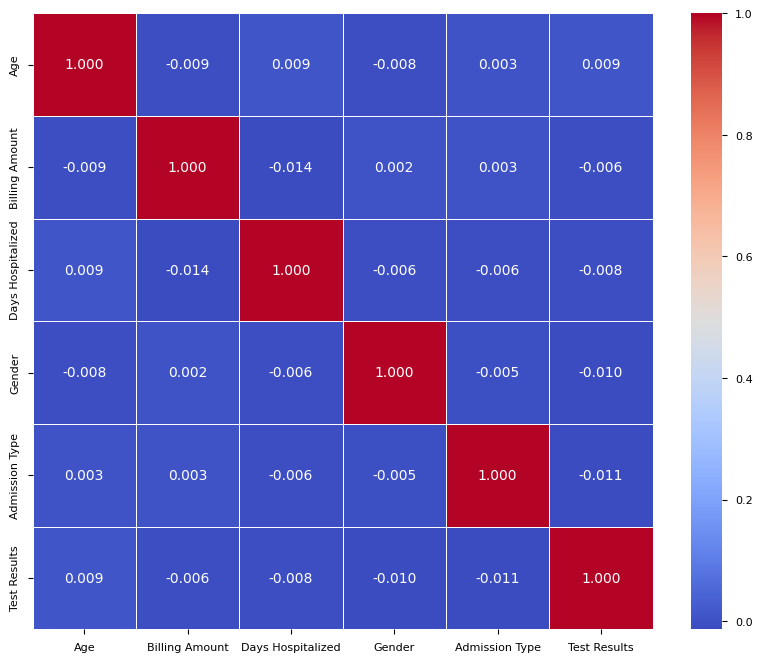

In [ ]:
#plotting correlation matrix using heatmap

plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.3f', linewidths = 0.5)
plt.show()

**Interpretation**:


*   Gender has a negative correlation with every attribute except for billing amount.
*   Days hospitalized have a negative correlation with every attribute acept for age.
*   There is a slight positive correlation between age and test results



**What is the total billing amount for the top 10 hospitals?**

In [ ]:
#grouping data by hospital and ordering by total billing amount for each hospital
top10_hospital_billing = hc.groupby(['Hospital'])['Billing Amount'].sum().sort_values(ascending = False)[:10].reset_index()
top10_hospital_billing

,Hospital,Billing Amount
0,Smith and Sons,477638.881124
1,Smith PLC,432283.548554
2,Smith Ltd,428163.073062
3,Smith Inc,351463.888372
4,Williams LLC,327522.472644
5,Thomas Group,327045.374505
6,Johnson Ltd,305971.192470
7,Davis and Sons,293452.520353
8,Jones Inc,290351.193848
9,Brown LLC,284695.674489


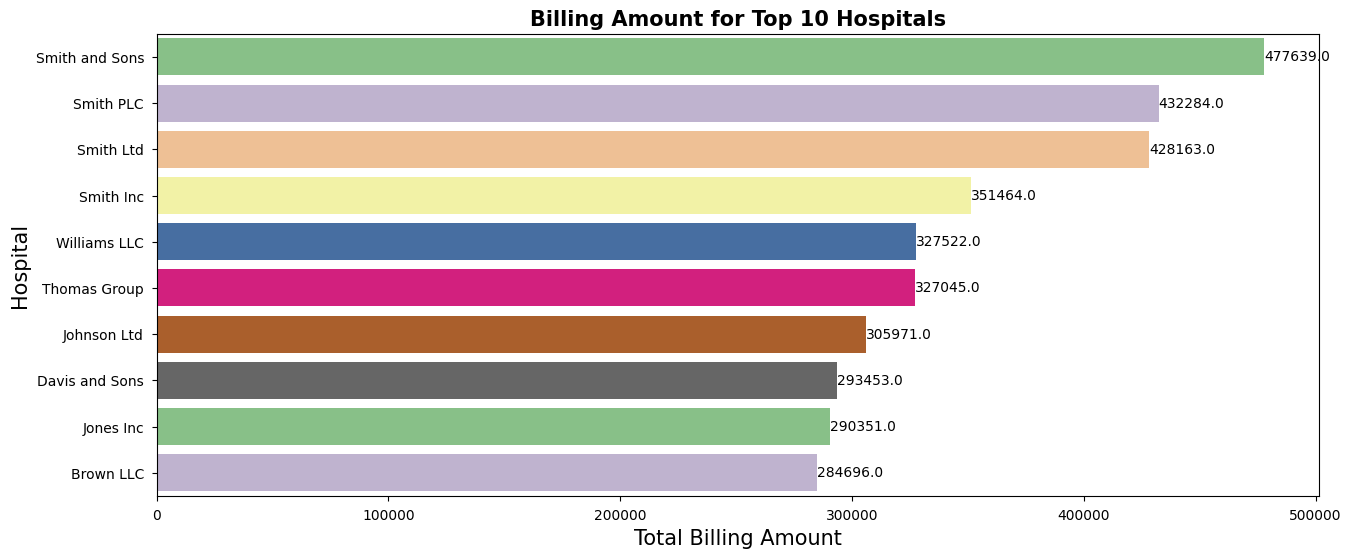

In [ ]:
#plotting a bar graph to find the top 10 hospitals by billing

plt.figure(figsize = (15,6))
sns.barplot(x= top10_hospital_billing['Billing Amount'],
            y= top10_hospital_billing['Hospital'],
            palette='Accent')

for index,value in enumerate(top10_hospital_billing['Billing Amount']):
  plt.text(value,index,str(round(value,0)), fontsize = 10, va='center')

#labels and title
plt.xlabel('Total Billing Amount', fontsize = 15)
plt.ylabel('Hospital',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 10 Hospitals',fontsize = 15, weight = 'bold')
plt.show()


**Who are the top 20 doctors by billing amount?**

In [ ]:
top20_doctors_billing = hc.groupby(['Doctor'])['Billing Amount'].sum().sort_values(ascending = False)[:20].reset_index()
top20_doctors_billing

,Doctor,Billing Amount
0,Michael Johnson,181576.474893
1,Christopher Davis,159763.924755
2,Jennifer Smith,149972.685230
3,Robert Brown,147747.938399
4,Angela Jones,141867.200639
5,Robert Miller,129493.950567
6,John Jones,127864.878980
7,Leslie Jones,123228.453342
8,Jessica Johnson,122383.408771
9,Daniel Smith,121830.506139


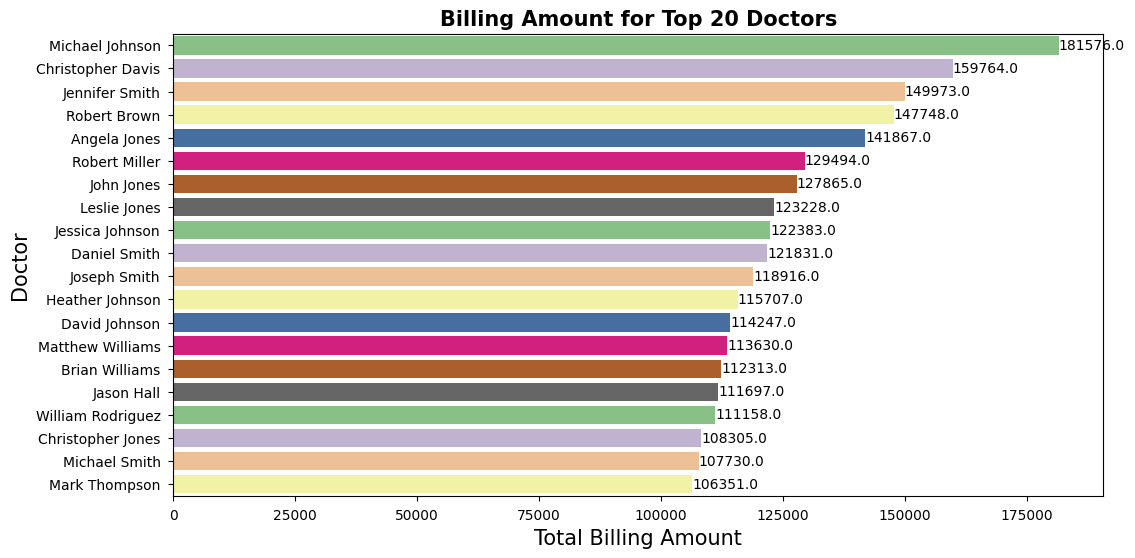

In [ ]:
#plotting bar graph to find top 20 doctos by billing
plt.figure(figsize =(12,6))
sns.barplot(x= top20_doctors_billing['Billing Amount'],
            y= top20_doctors_billing['Doctor'],
            palette="Accent")

for index, value in enumerate(top20_doctors_billing['Billing Amount']):
  plt.text(value,index,str(round(value, 0)), fontsize = 10, va = 'center')

#Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Doctor',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 20 Doctors',fontsize = 15, weight = 'bold')
plt.show()


**Which medical condition generated the highest average billing among male patients?**

In [ ]:
#group results by medical condition and then by gender
medical_gender_billing = hc.groupby(['Medical Condition', 'Gender'])['Billing Amount'].mean().sort_values(ascending = False).reset_index()

#filter results so that we only we see the male patients
medical_male_billing = medical_gender_billing.loc[medical_gender_billing['Gender'] == 'Male']

medical_male_billing

,Medical Condition,Gender,Billing Amount
1,Obesity,Male,25780.313444
2,Diabetes,Male,25740.384845
3,Cancer,Male,25722.399683
5,Arthritis,Male,25670.983684
8,Hypertension,Male,25268.489378
9,Asthma,Male,25148.724551


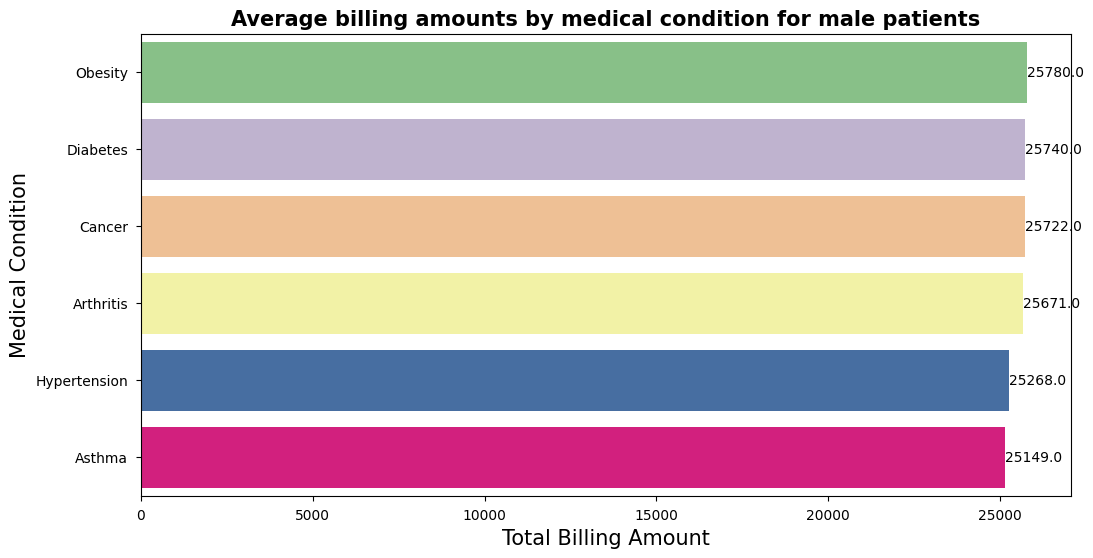

In [ ]:
#plotting bar graph to find top 20 doctos by billing
plt.figure(figsize =(12,6))
sns.barplot(x= medical_male_billing['Billing Amount'],
            y= medical_male_billing['Medical Condition'],
            palette="Accent")

for index, value in enumerate(medical_male_billing['Billing Amount']):
  plt.text(value,index,str(round(value, 0)), fontsize = 10, va = 'center')

#Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Medical Condition',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Average billing amounts by medical condition for male patients',fontsize = 15, weight = 'bold')
plt.show()

**What is the distribution of different age groups?**

In [ ]:
#first let's observe the minimum and maximum ages
min_age = hc['Age'].min()
max_age = hc['Age'].max()

print("Minimum age:", min_age, "\nMaximum age:", max_age)

Minimum age: 18 
Maximum age: 85


In [32]:
hc['Age Group'] = pd.cut(hc['Age'], bins = [18,30,40,50,60,70,80,float('inf')],
                         labels = ['18-30', '31-40', '41-50', '51-60','61-70','71-80','Over 80'],
                         right = False)

#counting the occurrences of each age group
age_group_counts = hc['Age Group'].value_counts()

#ordering the age group bins
age_group_order = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', 'Over 80']

#reindexing to match the order of age groups
age_group_ordered = age_group_counts.reindex(age_group_order)

age_group_ordered

18-30      1774
31-40      1495
41-50      1397
51-60      1521
61-70      1467
71-80      1523
Over 80     823
Name: Age Group, dtype: int64

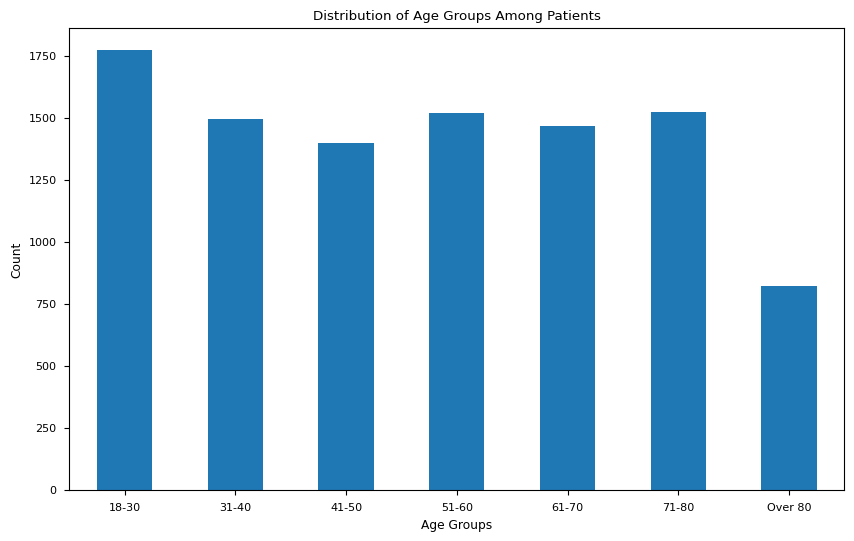

In [33]:
plt.figure(figsize=(10,6))
age_group_ordered.plot(kind = 'bar')
plt.title('Distribution of Age Groups Among Patients')
plt.xlabel('Age Groups')
plt.ylabel('Count')

plt.xticks(rotation=0)
plt.show()